## Machine Learning Assignment 1
### Murtaza Hussain (29449) and Muhammad Asad ur Rehman (29456)
UCI-ML Dataset Link: https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition

In [1]:
#Import libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo 
from lazypredict.Supervised import LazyClassifier

In [2]:
# Data Loader loads data from UCI-ML Repo
def load_dataset():
    # fetch dataset
    obesityDB = fetch_ucirepo(id=544) 

    # data (as pandas dataframes) 
    x = obesityDB.data.features 
    y = obesityDB.data.targets 
    z = obesityDB.data.original

    # metadata 
    print(obesityDB.metadata) 

    # variable information 
    print(obesityDB.variables)

    return x, y, z

# UCI-ML Repo Provides us with 3 Pandas DF inherently:
# 1. features (contains only the features)
# 2. targets (the targets to be preddicted)
# 3. original (contains both features and targets)
features, targets, original = load_dataset()

{'uci_id': 544, 'name': 'Estimation of obesity levels based on eating habits and physical condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Dec 19 2023', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'title': 'Dataset f

In [3]:
# This function performs a missing value analysis on each column of the dataset, helps you decide on what to do in cleaning process
def null_check(df):
    null_columns = []
    for column in df.columns:
        print("Column Name:", column)
        print("Column DataType:", df[column].dtype)
        if df[column].dtype != 'float64':
            print("Column unique values:", df[column].unique())
        print("Column has null:", df[column].isnull().any())
        if df[column].isnull().any() == True:
            print("Column Null Count:", df[column].isnull().sum())
            null_columns.append(column)
        print("\n")
    return null_columns

null_cols = null_check(original)

Column Name: Gender
Column DataType: object
Column unique values: ['Female' 'Male']
Column has null: False


Column Name: Age
Column DataType: float64
Column has null: False


Column Name: Height
Column DataType: float64
Column has null: False


Column Name: Weight
Column DataType: float64
Column has null: False


Column Name: family_history_with_overweight
Column DataType: object
Column unique values: ['yes' 'no']
Column has null: False


Column Name: FAVC
Column DataType: object
Column unique values: ['no' 'yes']
Column has null: False


Column Name: FCVC
Column DataType: float64
Column has null: False


Column Name: NCP
Column DataType: float64
Column has null: False


Column Name: CAEC
Column DataType: object
Column unique values: ['Sometimes' 'Frequently' 'Always' 'no']
Column has null: False


Column Name: SMOKE
Column DataType: object
Column unique values: ['no' 'yes']
Column has null: False


Column Name: CH2O
Column DataType: float64
Column has null: False


Column Name: SCC
C

In [4]:
# This function drops any null columns and missing values
# This is where you decide whether to remove NULL rows (which will reduce the size of Dataset) or remove NULL columns entirely. You can also choose a combination of both.
def clean_data(df, drop_columns, missing_value):
    # Remove unnecessary columns
    df.drop(drop_columns, axis=1, inplace=True)
    # Drop rows with any missing values
    if missing_value == False:
        df.dropna(inplace=True)
    else:
        df.fillna(missing_value, inplace=True)
    return df

clean_data(original,null_cols,False)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.00,1.62,64.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,0.00,1.00,no,Public_Transportation,Normal_Weight
1,Female,21.00,1.52,56.00,yes,no,3.00,3.00,Sometimes,yes,3.00,yes,3.00,0.00,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.00,1.80,77.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,2.00,1.00,Frequently,Public_Transportation,Normal_Weight
3,Male,27.00,1.80,87.00,no,no,3.00,3.00,Sometimes,no,2.00,no,2.00,0.00,Frequently,Walking,Overweight_Level_I
4,Male,22.00,1.78,89.80,no,no,2.00,1.00,Sometimes,no,2.00,no,0.00,0.00,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.98,1.71,131.41,yes,yes,3.00,3.00,Sometimes,no,1.73,no,1.68,0.91,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.98,1.75,133.74,yes,yes,3.00,3.00,Sometimes,no,2.01,no,1.34,0.60,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.52,1.75,133.69,yes,yes,3.00,3.00,Sometimes,no,2.05,no,1.41,0.65,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.36,1.74,133.35,yes,yes,3.00,3.00,Sometimes,no,2.85,no,1.14,0.59,Sometimes,Public_Transportation,Obesity_Type_III


In [5]:
# Transforms categorical and numberical data into numerical data
def transform_data(df):
    # Encode categorical variables
    label_encoder = LabelEncoder()
    print("Categorical columns:", df.select_dtypes(include=['object']).columns)
    for col in df.select_dtypes(include=['object']).columns:
        df[col] = label_encoder.fit_transform(df[col])
    
    # Standardize numerical features
    scaler = StandardScaler()
    print("Numerical columns:", df.select_dtypes(include=['float64', 'int64']).columns)
    numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
    if len(numerical_cols) > 0:
        df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    return df

transform_data(original)

Categorical columns: Index(['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE',
       'SCC', 'CALC', 'MTRANS', 'NObeyesdad'],
      dtype='object')
Numerical columns: Index(['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE'], dtype='object')


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,-0.52,-0.88,-0.86,1,0,-0.79,0.40,2,0,-0.01,0,-1.19,0.56,3,3,1
1,0,-0.52,-1.95,-1.17,1,0,1.09,0.40,2,1,1.62,1,2.34,-1.08,2,3,1
2,1,-0.21,1.05,-0.37,1,0,-0.79,0.40,2,0,-0.01,0,1.16,0.56,1,3,1
3,1,0.42,1.05,0.02,0,0,1.09,0.40,2,0,-0.01,0,1.16,-1.08,1,4,5
4,1,-0.36,0.84,0.12,0,0,-0.79,-2.17,2,0,-0.01,0,-1.19,-1.08,2,3,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,0,-0.53,0.10,1.71,1,1,1.09,0.40,2,0,-0.46,0,0.78,0.41,2,3,4
2107,0,-0.37,0.50,1.80,1,1,1.09,0.40,2,0,-0.00,0,0.39,-0.10,2,3,4
2108,0,-0.28,0.54,1.80,1,1,1.09,0.40,2,0,0.08,0,0.47,-0.02,2,3,4
2109,0,0.01,0.40,1.79,1,1,1.09,0.40,2,0,1.38,0,0.15,-0.12,2,3,4


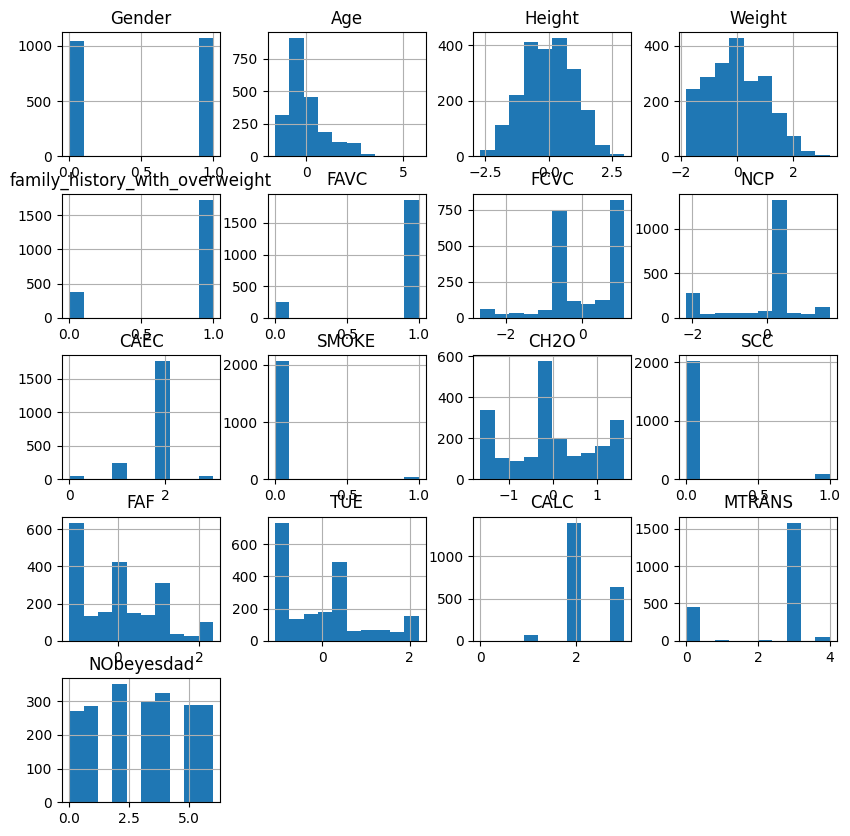

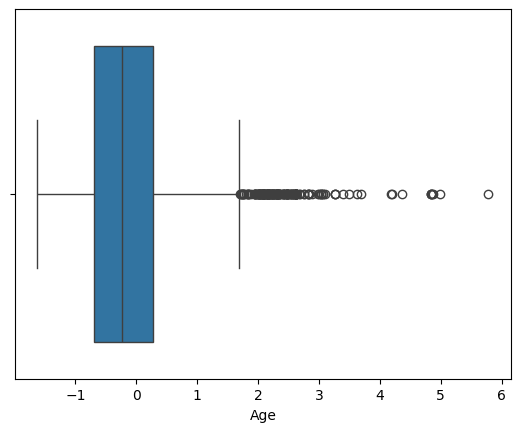

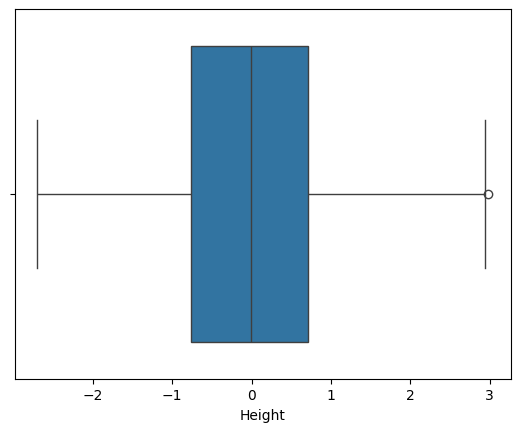

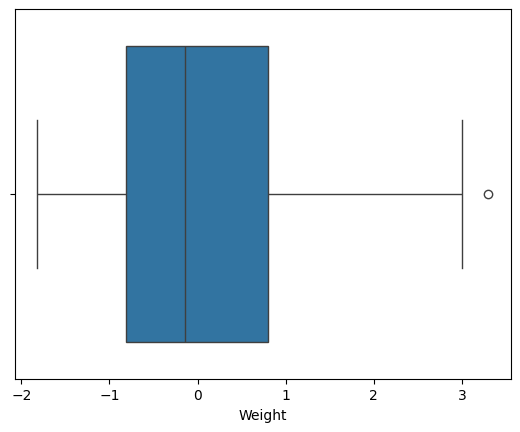

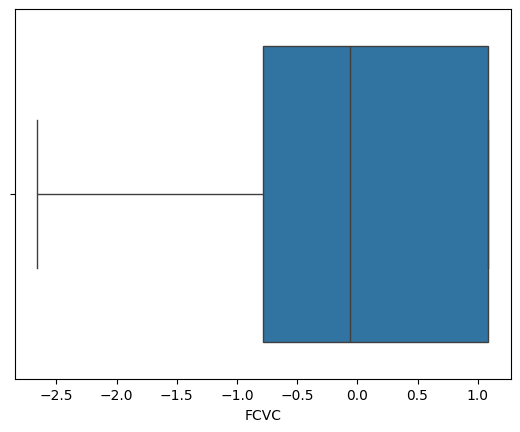

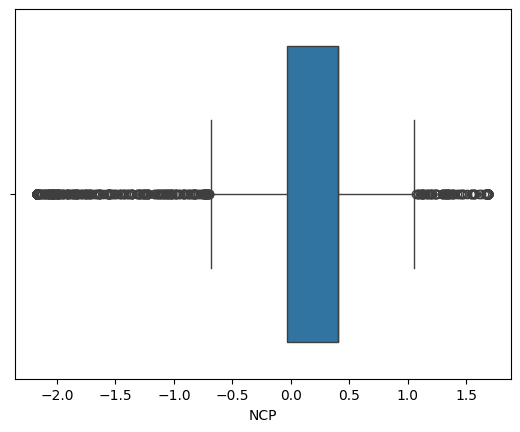

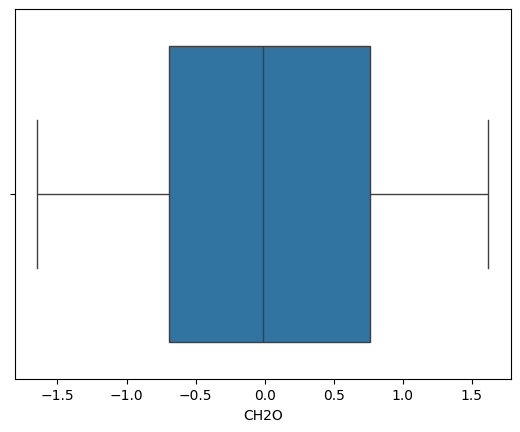

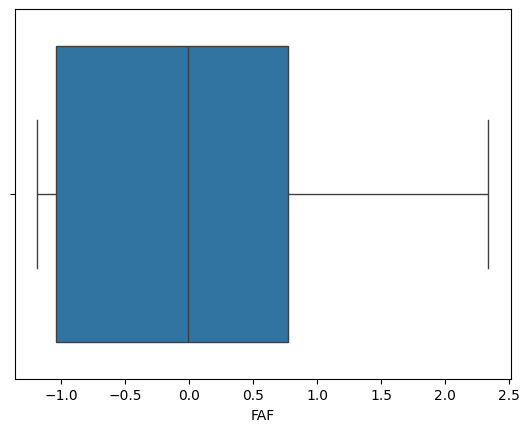

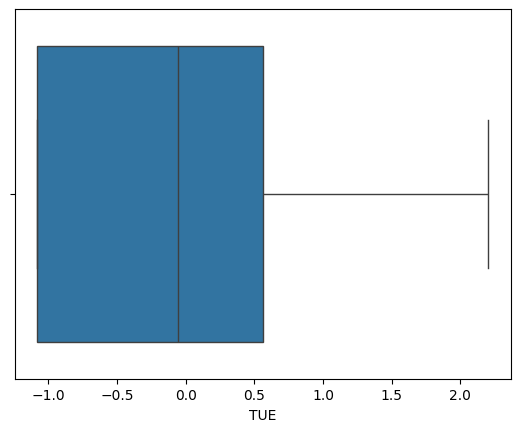

In [6]:
# Creates histograms for categorical data
def plot_histograms(df):
    df.hist(figsize=(10, 10))
    plt.show()

# Creates boxplot for numerical data
def plot_boxplots(df):
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        sns.boxplot(x=df[col])
        plt.show()

plot_histograms(original)
plot_boxplots(original)

In [7]:
def outlier_removal(df, excluded_columns = []):
    for column in df.select_dtypes(include=['float64', 'int64']).columns:
        if column not in excluded_columns:
            # Calculate Q1, Q3, and IQR
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1

            # Define the range for outliers
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR

            # Filter out outliers
            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

In [8]:
def generate_summary_statistics(original):
    """
    Generate summary statistics for a given DataFrame.

    Parameters:
    df (DataFrame): Input DataFrame.

    Returns:
    DataFrame: Summary statistics DataFrame.
    """
    # Compute mean
    mean = original.mean()

    # Compute mode
    mode = original.mode().iloc[0]  # Mode may have multiple values, so we take the first one

    # Compute median
    median = original.median()

    # Compute quartiles
    quartiles = original.quantile([0.25, 0.5, 0.75])

    # Compute minimum and maximum
    minimum = original.min()
    maximum = original.max()

    # Combine the results into a DataFrame for easier visualization
    summary_df = pd.DataFrame({
        'Mean': mean,
        'Mode': mode,
        'Median': median,
        'Q1': quartiles.loc[0.25],
        'Q2': quartiles.loc[0.5],
        'Q3': quartiles.loc[0.75],
        'Minimum': minimum,
        'Maximum': maximum
    })

    return summary_df

In [9]:
# Runs KNNClassifier on default settings
def knn_classifier(df, target_name):
    # Separate features and targets and perform data splitting
    X = df.drop(target_name, axis=1)
    y = df[target_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    knn_model = KNeighborsClassifier()
    
    knn_model.fit(X_train, y_train)
    predictions = knn_model.predict(X_test)
    print(classification_report(y_test, predictions))
    print("Accuracy:", accuracy_score(y_test, predictions))

In [10]:
# Runs KNN CV on default settings
def knn_cv(df, target_name, cv=5):

    # Separate features and targets
    X = df.drop(target_name, axis=1)
    y = df[target_name]

    # Initialize the KNN classifier
    knn_classifier = KNeighborsClassifier()
    
    # Initialize k-fold cross-validation
    k_fold = StratifiedKFold(n_splits=cv, shuffle=True, random_state=42)
    
    # Perform cross-validation and compute scores
    scores = cross_val_score(knn_classifier, X, y, cv=k_fold, scoring='accuracy')
    
    # Calculate and print the mean and standard deviation of the scores
    mean_accuracy = scores.mean()
    std_accuracy = scores.std()
    
    print("Cross-Validation Scores:", scores)
    print("Mean Accuracy:", mean_accuracy)
    print("Standard Deviation of Accuracy:", std_accuracy)

In [11]:
def lazy_classifier(df, target_name):
    # Separate features and targets and perform data splitting
    X = df.drop(target_name, axis=1)
    y = df[target_name]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    # Initialize Lazy Classifier
    clf = LazyClassifier(verbose=0, ignore_warnings=False, custom_metric=None, predictions=True)

    # Generate predictions and evaluate performance
    models, predictions = clf.fit(X_train, X_test, y_train, y_test)
    print("Mean Accuracy of the Dataset: ", models['Accuracy'].mean())
    print("Standard Deviation of Accuracy of the Dataset: ", models['Accuracy'].std())
    
    return models

model = lazy_classifier(original, targets.columns[0])

  7%|▋         | 2/29 [00:00<00:05,  4.94it/s]

ROC AUC couldn't be calculated for AdaBoostClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for BaggingClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for BernoulliNB
multi_class must be in ('ovo', 'ovr')


 14%|█▍        | 4/29 [00:02<00:21,  1.18it/s]

ROC AUC couldn't be calculated for CalibratedClassifierCV
multi_class must be in ('ovo', 'ovr')
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
ROC AUC couldn't be calculated for DecisionTreeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for DummyClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for ExtraTreeClassifier
multi_class must be in ('ovo', 'ovr')


 31%|███       | 9/29 [00:03<00:06,  3.14it/s]

ROC AUC couldn't be calculated for ExtraTreesClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for GaussianNB
multi_class must be in ('ovo', 'ovr')


 38%|███▊      | 11/29 [00:03<00:04,  3.68it/s]

ROC AUC couldn't be calculated for KNeighborsClassifier
multi_class must be in ('ovo', 'ovr')


 41%|████▏     | 12/29 [00:03<00:04,  3.81it/s]

ROC AUC couldn't be calculated for LabelPropagation
multi_class must be in ('ovo', 'ovr')


 45%|████▍     | 13/29 [00:04<00:04,  3.72it/s]

ROC AUC couldn't be calculated for LabelSpreading
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LinearDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')


 52%|█████▏    | 15/29 [00:04<00:03,  3.86it/s]

ROC AUC couldn't be calculated for LinearSVC
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LogisticRegression
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for NearestCentroid
multi_class must be in ('ovo', 'ovr')


 62%|██████▏   | 18/29 [00:05<00:02,  4.89it/s]

ROC AUC couldn't be calculated for NuSVC
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for PassiveAggressiveClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for Perceptron
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for QuadraticDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')


 86%|████████▌ | 25/29 [00:05<00:00,  7.59it/s]

ROC AUC couldn't be calculated for RandomForestClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for RidgeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for RidgeClassifierCV
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for SGDClassifier
multi_class must be in ('ovo', 'ovr')


 93%|█████████▎| 27/29 [00:05<00:00,  7.70it/s]

ROC AUC couldn't be calculated for SVC
multi_class must be in ('ovo', 'ovr')
StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'
ROC AUC couldn't be calculated for XGBClassifier
multi_class must be in ('ovo', 'ovr')
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000315 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2069
[LightGBM] [Info] Number of data points in the train set: 1688, number of used features: 16
[LightGBM] [Info] Start training from score -2.046805
[LightGBM] [Info] Start training from score -1.997578
[LightGBM] [Info] Start training from score -1.792945
[LightGBM] [Info] Start training from score -1.963240
[LightGBM] [Info] Start training from score -1.874472
[LightGBM] [Info] Start training from score -1.984562
[LightGBM] [Info] Start training f

100%|██████████| 29/29 [00:08<00:00,  3.41it/s]

ROC AUC couldn't be calculated for LGBMClassifier
multi_class must be in ('ovo', 'ovr')
Mean Accuracy of the Dataset:  0.7455564311356274
Standard Deviation of Accuracy of the Dataset:  0.19262441806477906


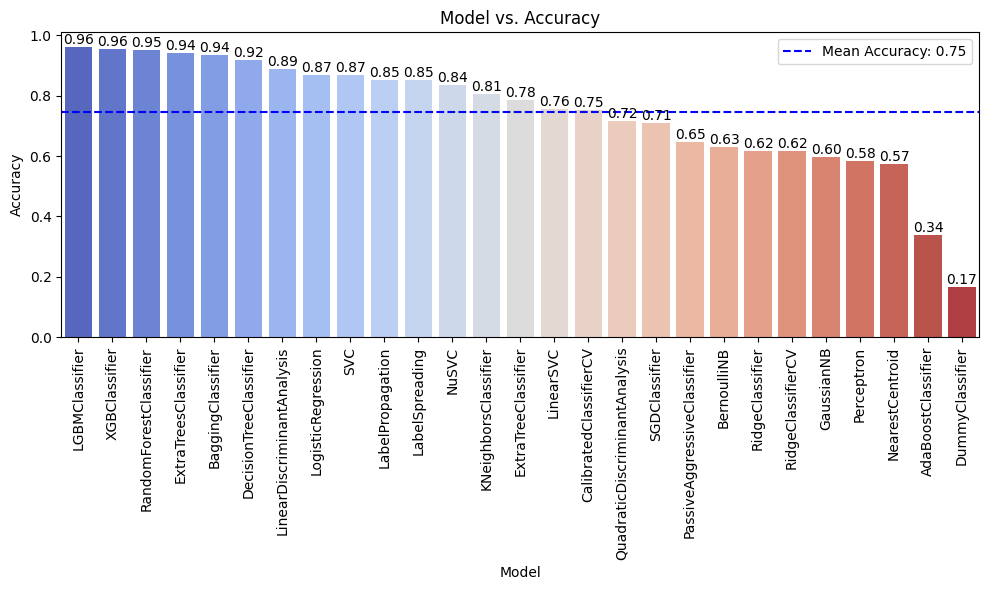

In [12]:
# Plot a model vs Accuracy graph for Lazy Predict
def plot_model_accuracy_graph(df):
    mean_accuracy = df['Accuracy'].mean()
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(x='Model', y='Accuracy', data=df, palette='coolwarm')
    plt.axhline(mean_accuracy, color='blue', linestyle='--', label=f'Mean Accuracy: {mean_accuracy:.2f}')
    plt.title('Model vs. Accuracy')
    plt.xlabel('Model')
    plt.ylabel('Accuracy')
    plt.xticks(rotation=90)
    plt.legend()

    for i in range(len(df)):
        plt.text(i, df['Accuracy'][i], f"{df['Accuracy'][i]:.2f}", ha = 'center', va = 'bottom')

    plt.tight_layout()
    plt.show()

plot_model_accuracy_graph(model)

In [13]:
# Master Workflow, combines and manages all the workflow from one place
# Specifically Tailored for Mushroom Dataset
def master_workflow():
    features, targets, original = load_dataset()
    null_cols = null_check(original)
    original = clean_data(original,null_cols,False)
    original = transform_data(original)
    print("Original Summary Statistics: \n", generate_summary_statistics(original))
    plot_histograms(original)
    print("Original Boxplots: \n")
    plot_boxplots(original)
    original = outlier_removal(original)
    print("Summary Statistics after outlier removal: \n", generate_summary_statistics(original))
    print("Boxplots after outlier removal: \n")
    plot_boxplots(original)
    print("KNN Classifier:")
    knn_classifier(original, targets.columns[0])
    print("Cross-Validation with KNN Classifier:")
    knn_cv(original, targets.columns[0])
    print("Lazy Predict for different models:")
    model = lazy_classifier(original, targets.columns[0])
    plot_model_accuracy_graph(model)

{'uci_id': 544, 'name': 'Estimation of obesity levels based on eating habits and physical condition ', 'repository_url': 'https://archive.ics.uci.edu/dataset/544/estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition', 'data_url': 'https://archive.ics.uci.edu/static/public/544/data.csv', 'abstract': 'This dataset include data for the estimation of obesity levels in individuals from the countries of Mexico, Peru and Colombia, based on their eating habits and physical condition. ', 'area': 'Health and Medicine', 'tasks': ['Classification', 'Regression', 'Clustering'], 'characteristics': ['Multivariate'], 'num_instances': 2111, 'num_features': 16, 'feature_types': ['Integer'], 'demographics': ['Gender', 'Age'], 'target_col': ['NObeyesdad'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Dec 19 2023', 'dataset_doi': '10.24432/C5H31Z', 'creators': [], 'intro_paper': {'title': 'Dataset f

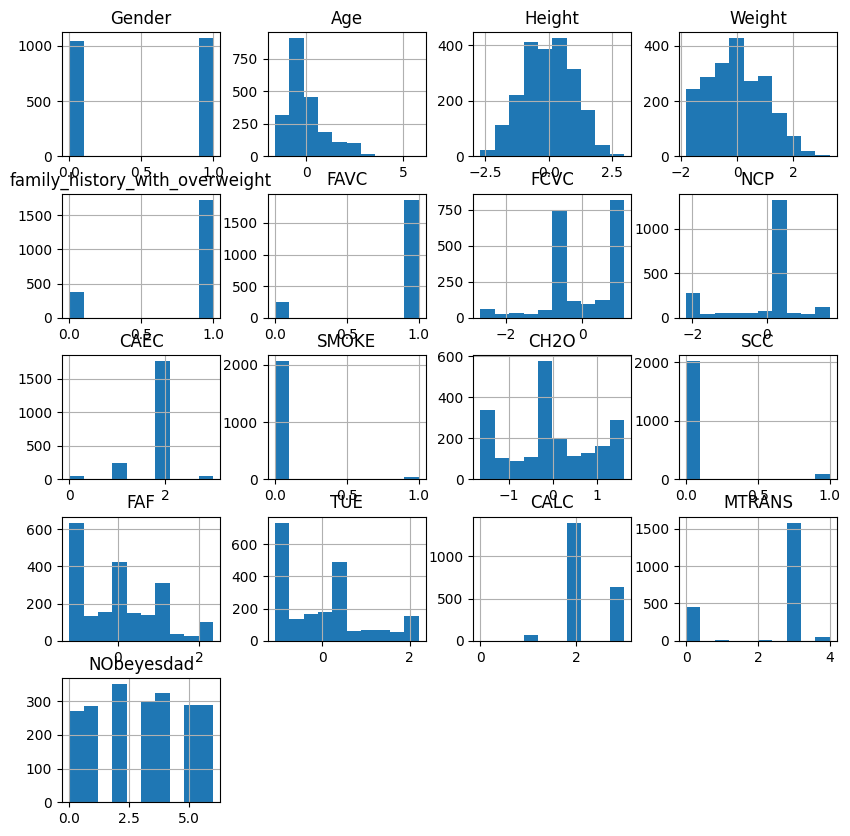

Original Boxplots: 



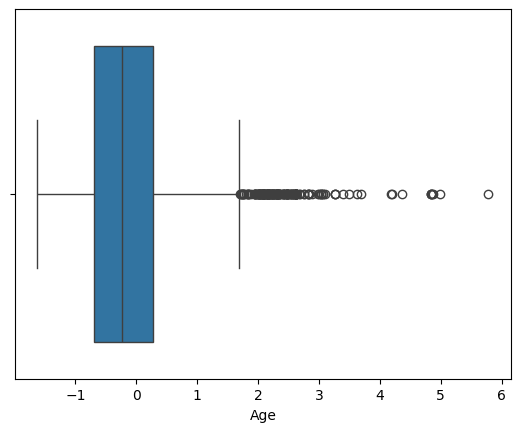

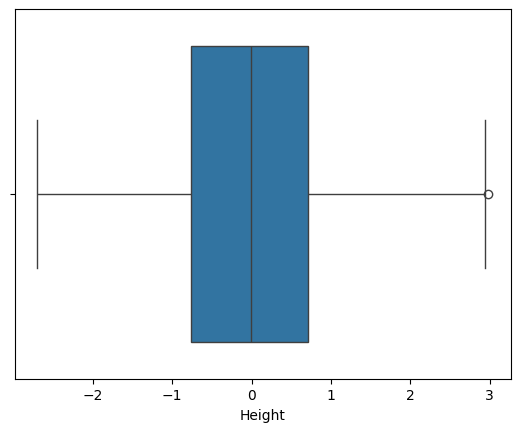

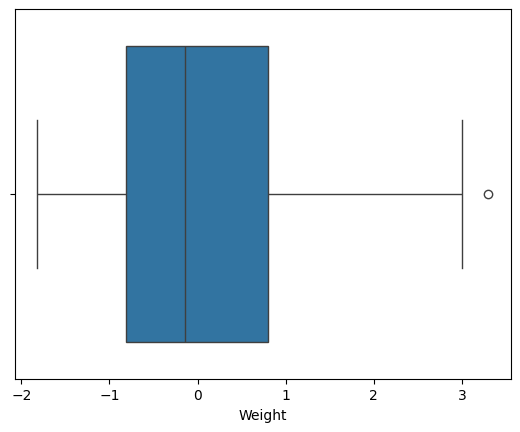

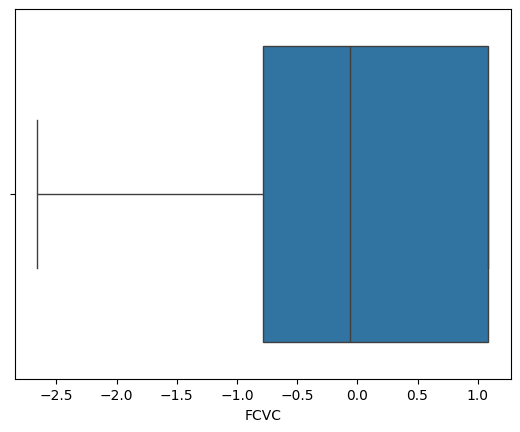

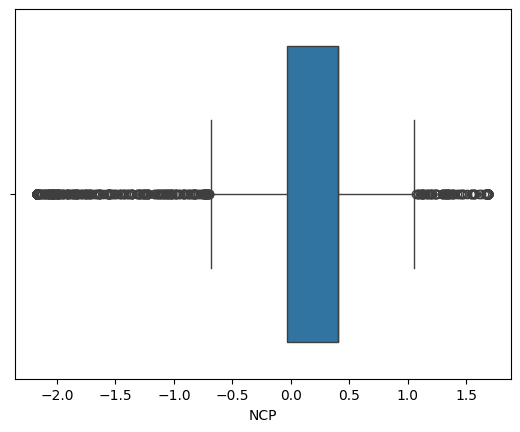

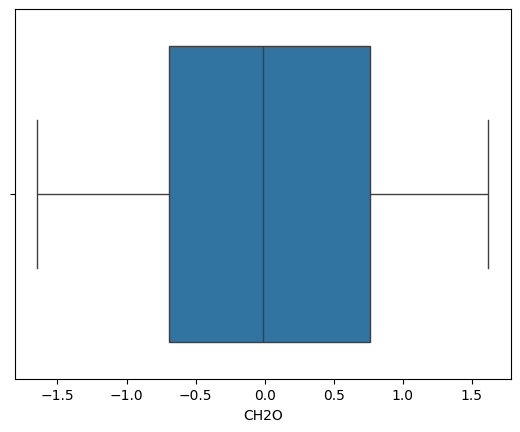

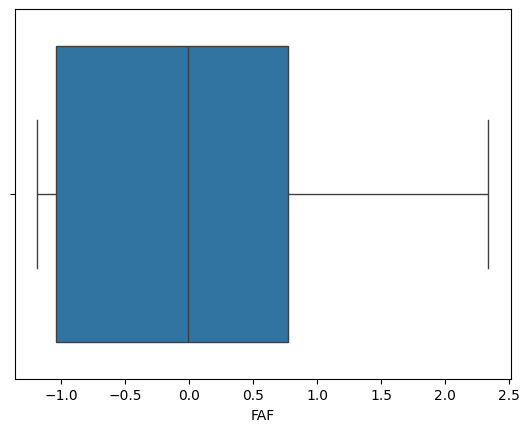

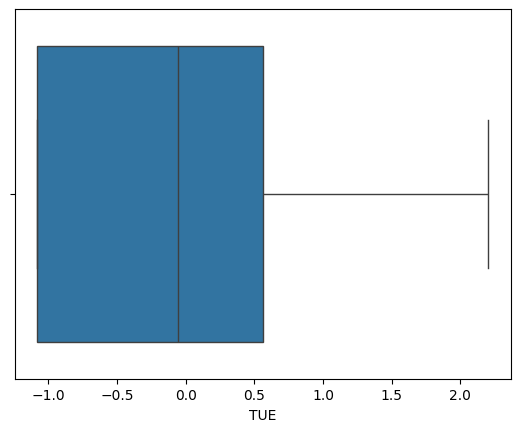

Summary Statistics after outlier removal: 
                                 Mean  Mode  Median    Q1    Q2   Q3  Minimum  \
Gender                          0.52  1.00    1.00  0.00  1.00 1.00     0.00   
Age                            -0.18  0.27   -0.24 -0.69 -0.24 0.26    -1.63   
Height                          0.14 -0.02    0.14 -0.55  0.14 0.79    -2.70   
Weight                          0.20 -0.44    0.13 -0.63  0.13 1.00    -1.82   
family_history_with_overweight  0.85  1.00    1.00  1.00  1.00 1.00     0.00   
FAVC                            0.89  1.00    1.00  1.00  1.00 1.00     0.00   
FCVC                            0.06  1.09    0.25 -0.79  0.25 1.09    -2.66   
NCP                             0.36  0.40    0.40  0.40  0.40 0.40    -0.60   
CAEC                            1.87  2.00    2.00  2.00  2.00 2.00     0.00   
SMOKE                           0.02  0.00    0.00  0.00  0.00 0.00     0.00   
CH2O                            0.06 -0.01   -0.01 -0.55 -0.01 0.86    -1.64

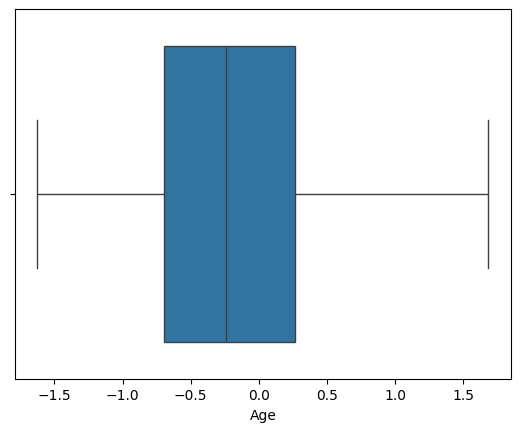

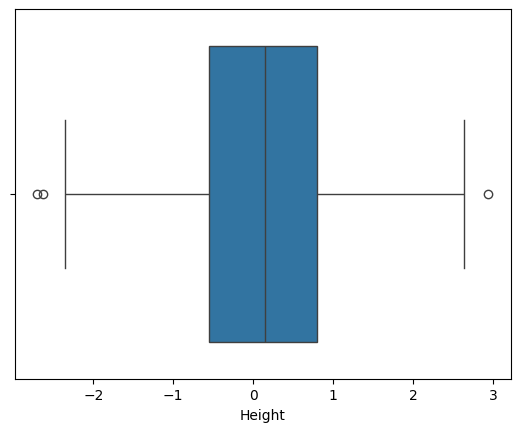

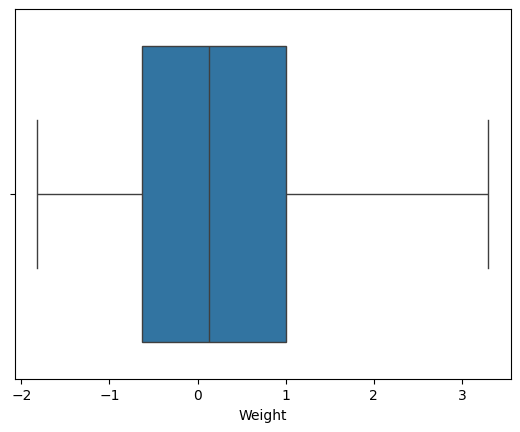

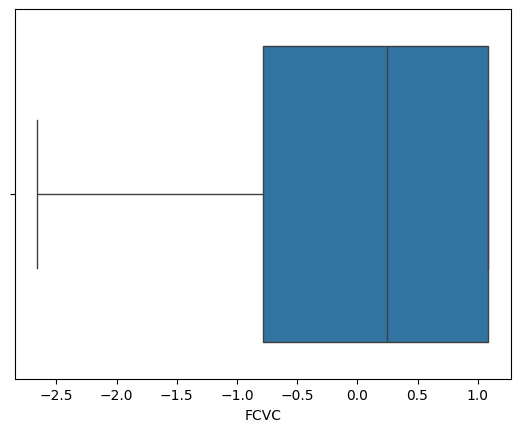

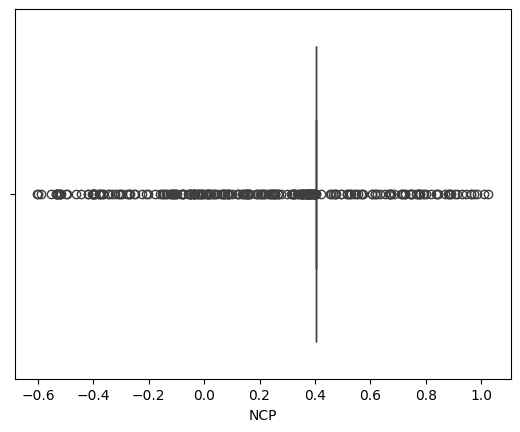

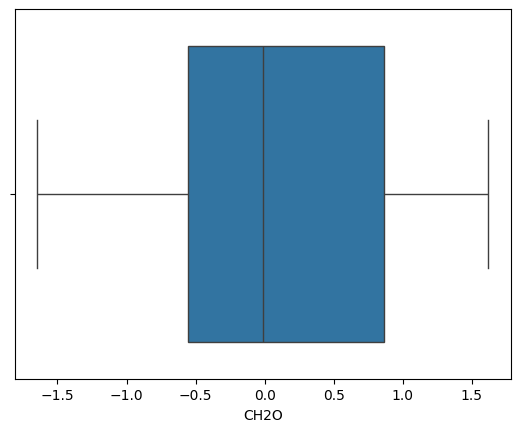

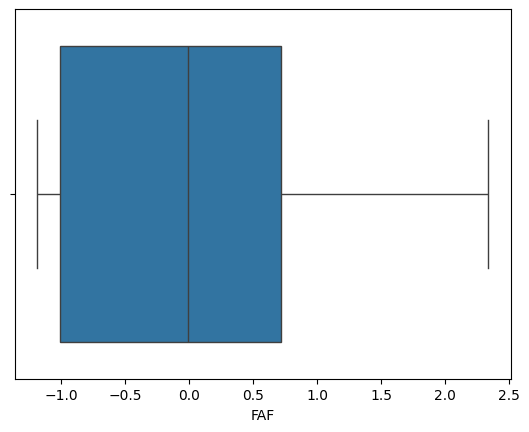

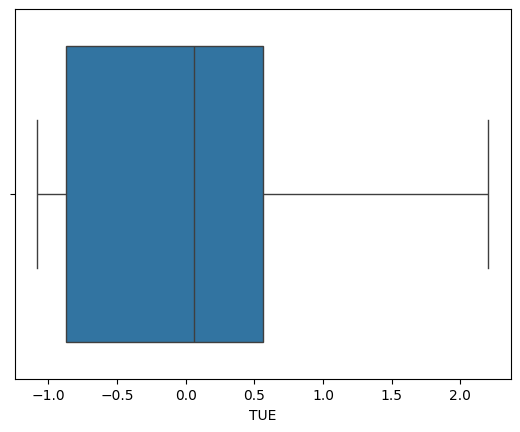

KNN Classifier:
              precision    recall  f1-score   support

           0       0.68      0.97      0.80        29
           1       0.83      0.38      0.52        40
           2       0.84      0.82      0.83        39
           3       0.91      1.00      0.96        43
           4       0.98      1.00      0.99        65
           5       0.56      0.77      0.65        30
           6       0.76      0.65      0.70        34

    accuracy                           0.81       280
   macro avg       0.80      0.80      0.78       280
weighted avg       0.83      0.81      0.80       280

Accuracy: 0.8142857142857143
Cross-Validation with KNN Classifier:
Cross-Validation Scores: [0.83928571 0.83571429 0.84285714 0.80645161 0.82437276]
Mean Accuracy: 0.8297363031234
Standard Deviation of Accuracy: 0.013191120951203611
Lazy Predict for different models:


 10%|█         | 3/29 [00:00<00:03,  8.34it/s]

ROC AUC couldn't be calculated for AdaBoostClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for BaggingClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for BernoulliNB
multi_class must be in ('ovo', 'ovr')


 17%|█▋        | 5/29 [00:02<00:13,  1.74it/s]

ROC AUC couldn't be calculated for CalibratedClassifierCV
multi_class must be in ('ovo', 'ovr')
CategoricalNB model failed to execute
Negative values in data passed to CategoricalNB (input X)
ROC AUC couldn't be calculated for DecisionTreeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for DummyClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for ExtraTreeClassifier
multi_class must be in ('ovo', 'ovr')


 31%|███       | 9/29 [00:02<00:05,  3.51it/s]

ROC AUC couldn't be calculated for ExtraTreesClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for GaussianNB
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for KNeighborsClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LabelPropagation
multi_class must be in ('ovo', 'ovr')


 48%|████▊     | 14/29 [00:03<00:02,  6.03it/s]

ROC AUC couldn't be calculated for LabelSpreading
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LinearDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')


 55%|█████▌    | 16/29 [00:03<00:02,  5.70it/s]

ROC AUC couldn't be calculated for LinearSVC
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for LogisticRegression
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for NearestCentroid
multi_class must be in ('ovo', 'ovr')


 62%|██████▏   | 18/29 [00:03<00:01,  6.50it/s]

ROC AUC couldn't be calculated for NuSVC
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for PassiveAggressiveClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for Perceptron
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for QuadraticDiscriminantAnalysis
multi_class must be in ('ovo', 'ovr')


 90%|████████▉ | 26/29 [00:04<00:00, 10.10it/s]

ROC AUC couldn't be calculated for RandomForestClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for RidgeClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for RidgeClassifierCV
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for SGDClassifier
multi_class must be in ('ovo', 'ovr')
ROC AUC couldn't be calculated for SVC
multi_class must be in ('ovo', 'ovr')
StackingClassifier model failed to execute
StackingClassifier.__init__() missing 1 required positional argument: 'estimators'


 97%|█████████▋| 28/29 [00:04<00:00,  7.79it/s]

ROC AUC couldn't be calculated for XGBClassifier
multi_class must be in ('ovo', 'ovr')
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000232 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1874
[LightGBM] [Info] Number of data points in the train set: 1118, number of used features: 16
[LightGBM] [Info] Start training from score -2.274365
[LightGBM] [Info] Start training from score -1.950392
[LightGBM] [Info] Start training from score -1.975872
[LightGBM] [Info] Start training from score -1.860241
[LightGBM] [Info] Start training from score -1.462469
[LightGBM] [Info] Start training from score -2.231805
[LightGBM] [Info] Start training from score -2.106642
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further s

100%|██████████| 29/29 [00:05<00:00,  5.08it/s]

ROC AUC couldn't be calculated for LGBMClassifier
multi_class must be in ('ovo', 'ovr')
Mean Accuracy of the Dataset:  0.7739417989417989
Standard Deviation of Accuracy of the Dataset:  0.19445263619334657


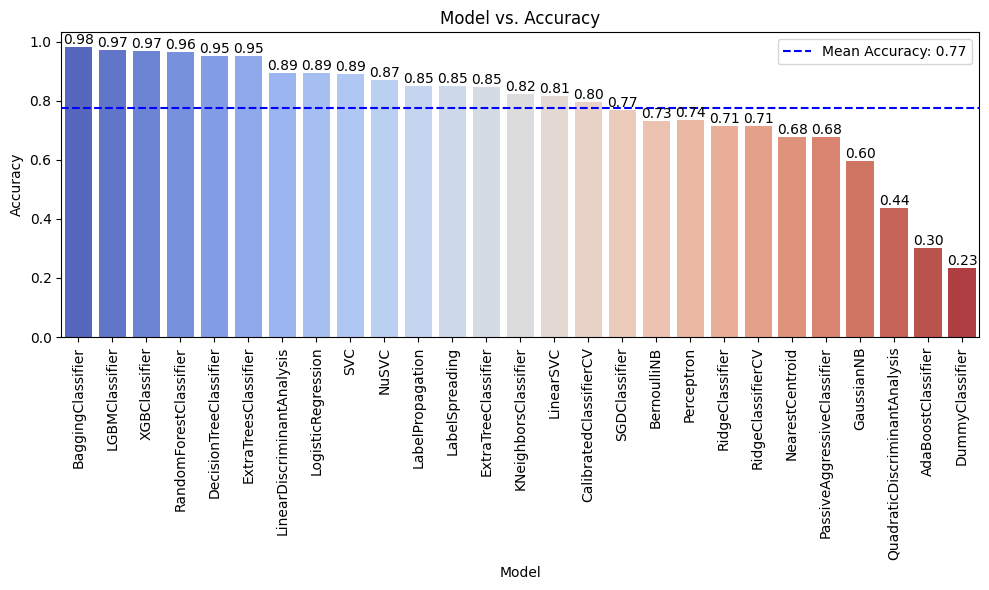

In [14]:
master_workflow()

### EDA Interpretation

Interpretation of EDA:
- Analysis of feature distributions and relationships showed that there was a significant amount of ouliers in almost all the continous columns.
- The dataset does not have any columns or features with Null values.

### ML Results Interpretation

Interpretation of ML Results:
- KNN was applied to the dataset, the accuracy of the model was 0.814.
- KNN with cross-validation was also applied to the dataset, the mean accuracy was 0.829 with a standard deviation of 0.013
- Additionally we also applied Lazy Predict on the dataset, the mean accuracy of the models was 0.774 with a standard deviation of 0.194
- It was observed that the model performed better with Cross Validation in comparision and better results were obtained for Decision Tree, Linear Regression and Random Forest Alogrithms.
- The model performance suggests that the model has a data with related features, however, feature selection would still be required to improve results. Additionally, many outliers were removed during the EDA process but there still might be a need for further data cleansing for better results.